<a href="https://colab.research.google.com/github/mrrk8879/Web-Scrapping/blob/main/Final%20Web_Scrapping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
import requests

url = "https://www.justwatch.com/in/movies?release_year_from=2000"

# Define headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.justwatch.com/in/movies?release_year_from=2000/"
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    print("Successfully retrieved the webpage")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

soup = BeautifulSoup(html_content, "html.parser")

Successfully retrieved the webpage


In [ ]:
movie_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Movie URL's**

In [ ]:
movie_url_list = []
for movie in movie_info:
  get_link = movie.find('a')['href']
  links = 'https://www.justwatch.com'+ get_link
  movie_url_list.append(links)
movie_url_list
len(movie_url_list)

100

## Scraping the datails

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.justwatch.com/"
}


# Initialize lists with None values
movie_title_list = [None] * len(movie_url_list)
release_year_list = [None] * len(movie_url_list)
genres_list = [None] * len(movie_url_list)
imdb_rating_list = [None] * len(movie_url_list)
runtime_list = [None] * len(movie_url_list)
age_rating_list = [None] * len(movie_url_list)
production_countries_list = [None] * len(movie_url_list)
streaming_service_list = [None] * len(movie_url_list)

# Function to fetch URL with retries
def fetch_url_with_retries(session, url, headers, max_retries=5):
    retry_count = 0
    delay = 1  # Initial delay in seconds
    while retry_count < max_retries:
        response = session.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            return response
        elif response.status_code == 429:
            print(f"Rate limit hit. Retrying in {delay} seconds...")
            time.sleep(delay)
            delay *= 2  # Exponential backoff
            retry_count += 1
        else:
            print(f"Failed with status code: {response.status_code}")
            return None
    return None

# Iterating the movie URL from the URL list
with requests.Session() as session:
    session.headers.update(headers)

    for idx, movie_url in enumerate(movie_url_list):
        print(f"Scraping for movie URL {movie_url}")
        response = fetch_url_with_retries(session, movie_url, headers)
        if response:
            print('Response: ', response.status_code)
            url_soup = BeautifulSoup(response.text, 'html.parser')


        # Exception handling for success and not found
        if response.status_code == 200:
            url_soup = BeautifulSoup(response.text, 'html.parser')


            # Extract movie title
            title_block = url_soup.find('div', class_='title-block')
            if title_block:
                title_tag = title_block.find('h1')
                if title_tag:
                    movie_title = title_tag.text.strip()
                    movie_title_list[idx] = movie_title

                # Extract Release Year
                year_tag = title_block.find('span', class_='text-muted')
                if year_tag:
                    release_year = re.sub(r"\(|\)", "", year_tag.text.strip())
                    release_year_list[idx] = release_year
            else:
                movie_title_list[idx] = None
                release_year_list[idx] = None

            # Extract Genres
            genre_tag = url_soup.find('h3', class_='detail-infos__subheading', string='Genres')
            if genre_tag:
                genre_sibling = genre_tag.find_next_sibling('div').find('span', class_='detail-infos__value')
                if genre_sibling:
                    genres = genre_sibling.text.strip()
                    genres_list[idx] = genres

            # Extract IMDb rating
            rating_tag = url_soup.find('img', alt='IMDB')
            if rating_tag:
                imdb_rating = rating_tag.find_next_sibling('span').text.strip()
                imdb_rating_list[idx] = imdb_rating[:3]

            # Extract runtime
            # Extract runtime
            runtime_tag = url_soup.find('h3', string='Runtime')
            if runtime_tag:
                runtime_sibling = runtime_tag.find_next_sibling('div', class_='detail-infos__value')
                if runtime_sibling:
                    runtime = runtime_sibling.text.strip()
                    runtime_list[idx] = runtime
                else:
                    runtime_list[idx] = None
            else:
                runtime_list[idx] = None



            # Extract age rating
            age_rating_tag = url_soup.find('h3', string='Age rating')
            if age_rating_tag:
                age_rating_sibling = age_rating_tag.find_next_sibling('div', class_='detail-infos__value')
                if age_rating_sibling:
                    age_rating = age_rating_sibling.text.strip()
                    age_rating_list[idx] = age_rating
                else:
                    age_rating_list[idx] = None
            else:
                age_rating_list[idx] = None


            # Extract Production countries
            production_tag = url_soup.find('h3', class_='detail-infos__subheading', string='Production country')
            if production_tag:
                production_sibling = production_tag.find_next_sibling('div', class_='detail-infos__value')
                if production_sibling:
                    prod_countries = production_sibling.text.strip()
                    production_countries_list[idx] = prod_countries


            # Extract streaming service
            streaming = url_soup.find('picture', class_='picture-wrapper')
            if streaming:
                strm_service = streaming.find('img')['alt']
                streaming_service_list[idx] = strm_service

        else:
            print(f"Scraping failed for movie URL {movie_url}")

        # Adding a delay to avoid overloading the server
        time.sleep(1)




Scraping for movie URL https://www.justwatch.com/in/movie/munjha
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/aavesham-2024
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/project-k
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/family-star
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/hit-man
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/godzilla-minus-one
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/the-fall-guy
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/inside-out
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire
Response:  200
Scraping for movie URL https://www.justwatch.com/in/movie/manjummel-boys
Response:  200
Scraping for movie URL htt

## **Scrapping Movie Title**

In [ ]:
movie_title_list

['Munjya',
 'Aavesham',
 'Kalki 2898 AD',
 'Family Star',
 'The Gangster, the Cop, the Devil',
 'Hit Man',
 'Godzilla Minus One',
 'The Fall Guy',
 'Inside Out',
 'Godzilla x Kong: The New Empire',
 'Manjummel Boys',
 'Furiosa: A Mad Max Saga',
 'Laapataa Ladies',
 'Rockstar',
 'Crew',
 'Dune: Part Two',
 'Maidaan',
 'Civil War',
 'Maharshi',
 'Aranmanai 4',
 'Maharaja',
 'Premalu',
 'Bade Miyan Chote Miyan',
 'Oppenheimer',
 'Mad Max: Fury Road',
 'Do Aur Do Pyaar',
 '365 Days',
 'Kung Fu Panda 4',
 'Challengers',
 'Srikanth',
 'Gangs of Godavari',
 'Hereditary',
 'Maharaj',
 'Madgaon Express',
 'Inside Out 2',
 'Exhuma',
 '12th Fail',
 'Garudan',
 'Animal',
 'Je Jatt Vigarh Gya',
 'Salaar',
 'Hanu-Man',
 'The Goat Life',
 'Guruvayoor Ambalanadayil',
 'Varshangalkku Shesham',
 'Dune',
 'Satyabhama',
 'Anyone But You',
 'Spider-Man: No Way Home',
 'Mallari',
 'Kill',
 'Abigail',
 'Shaitaan',
 'Kingdom of the Planet of the Apes',
 'A Quiet Place',
 'Chandu Champion',
 'Pushpa: The Rise'

## **Scrapping release Year**

In [ ]:
release_year_list

['2024',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2023',
 '2024',
 '2015',
 '2024',
 '2024',
 '2024',
 '2024',
 '2011',
 '2024',
 '2024',
 '2024',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2015',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2021',
 '2024',
 '2023',
 '2021',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2021',
 '2011',
 '2018',
 '2024',
 '2023',
 '2024',
 '2023',
 '2001',
 '2014',
 '2023',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2022',
 '2024',
 '2024',
 '2017',
 '2018',
 '2013',
 '2018',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2024',
 '2014',
 '2024',
 '2022',
 '2022',
 '2024',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2024']

## **Scrapping Genres**

In [ ]:
genres_list

['Comedy, Horror',
 'Comedy, Action & Adventure',
 'Drama, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Action & Adventure, Drama, Comedy, Romance',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Crime, Comedy, Romance',
 'Horror, Action & Adventure, Drama, Science-Fiction',
 'Comedy, Drama, Romance, Action & Adventure',
 'Animation, Kids & Family, Action & Adventure, Drama, Comedy, Fantasy',
 'Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Mystery & Thriller, Action & Adventure, Science-Fiction',
 'Comedy, Drama',
 'Drama, Music & Musical, Romance',
 'Comedy, Drama',
 'Science-Fiction, Action & Adventure, Drama',
 'Sport, Drama, History',
 'Action & Adventure, Mystery & Thriller, War & Military, Drama',
 'Action & Adventure, Drama',
 'Horror, Comedy',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Romance',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Dram

## **Scrapping IMBD Rating**

In [ ]:
imdb_rating_list

['7.2',
 '8.0',
 '7.9',
 '5.2',
 '6.9',
 '6.9',
 '7.7',
 '7.0',
 '8.1',
 '6.2',
 '8.3',
 '7.7',
 '8.5',
 '7.7',
 '5.9',
 '8.6',
 '8.1',
 '7.2',
 '7.2',
 '5.2',
 '8.6',
 '7.9',
 '4.1',
 '8.3',
 '8.1',
 '6.3',
 '3.3',
 '6.3',
 '7.3',
 '7.7',
 '5.1',
 '7.3',
 '6.4',
 '7.1',
 '7.9',
 '6.9',
 '8.9',
 '7.3',
 '6.2',
 '4.7',
 '6.5',
 '7.9',
 '8.6',
 '6.7',
 '6.7',
 '8.0',
 '7.0',
 '6.1',
 '8.2',
 '6.3',
 None,
 '6.6',
 '6.6',
 '7.2',
 '7.5',
 '8.3',
 '7.6',
 '7.0',
 '8.2',
 '7.8',
 '5.5',
 '7.8',
 '7.8',
 '7.6',
 '5.0',
 '7.7',
 '6.7',
 '8.2',
 None,
 '6.5',
 '7.8',
 '7.0',
 '5.2',
 '4.6',
 '6.1',
 '8.7',
 '7.7',
 '5.7',
 '7.9',
 '7.5',
 '8.2',
 '7.7',
 '6.9',
 '5.4',
 '7.5',
 '6.4',
 '5.6',
 '7.9',
 '5.5',
 '7.9',
 '6.8',
 '8.1',
 '6.9',
 '7.9',
 '7.6',
 '5.6',
 '5.3',
 '7.0',
 '6.3',
 '7.0']

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtime_list

['2h 3min',
 '2h 38min',
 '3h 1min',
 '2h 39min',
 '1h 50min',
 '1h 56min',
 '2h 5min',
 '2h 6min',
 '1h 35min',
 '1h 55min',
 '2h 15min',
 '2h 28min',
 '2h 2min',
 '2h 39min',
 '1h 58min',
 '2h 47min',
 '3h 1min',
 '1h 49min',
 '2h 56min',
 '2h 28min',
 '2h 30min',
 '2h 36min',
 '2h 44min',
 '3h 0min',
 '2h 1min',
 '2h 20min',
 '1h 54min',
 '1h 34min',
 '2h 12min',
 '2h 14min',
 '2h 23min',
 '2h 6min',
 '2h 12min',
 '2h 23min',
 '1h 37min',
 '2h 14min',
 '2h 26min',
 '2h 13min',
 '3h 21min',
 '2h 12min',
 '2h 55min',
 '2h 39min',
 '2h 52min',
 '2h 12min',
 '2h 46min',
 '2h 35min',
 '2h 12min',
 '1h 44min',
 '2h 28min',
 '2h 9min',
 '1h 45min',
 '1h 49min',
 '2h 12min',
 '2h 25min',
 '1h 31min',
 '2h 22min',
 '2h 59min',
 '1h 46min',
 '1h 53min',
 '2h 8min',
 '1h 48min',
 '2h 16min',
 '2h 7min',
 '2h 32min',
 '1h 45min',
 '2h 30min',
 '2h 26min',
 '2h 36min',
 '2h 1min',
 '1h 59min',
 '1h 59min',
 '2h 10min',
 '1h 44min',
 '1h 46min',
 '1h 55min',
 '2h 46min',
 '2h 56min',
 '2h 10min',

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_rating_list

[None,
 None,
 'UA',
 None,
 None,
 'A',
 None,
 'UA',
 'U',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 None,
 None,
 None,
 'UA',
 None,
 None,
 'U',
 'UA',
 'UA',
 'A',
 'UA',
 None,
 'U',
 'A',
 'U',
 'UA',
 'A',
 None,
 'UA',
 'U',
 'UA',
 None,
 'UA',
 'A',
 None,
 'A',
 'UA',
 'UA',
 None,
 None,
 'UA',
 'UA',
 'A',
 'UA',
 'A',
 'A',
 None,
 'UA',
 None,
 'A',
 'UA',
 'UA',
 'A',
 'A',
 None,
 'A',
 'UA',
 None,
 'U',
 None,
 'UA',
 'UA',
 'UA',
 None,
 'A',
 None,
 'U',
 'A',
 'A',
 None,
 'UA',
 None,
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 None,
 None,
 'A',
 None,
 None,
 None,
 'UA',
 None,
 None,
 'U',
 None,
 'UA',
 'A',
 'UA',
 None,
 None,
 None,
 None]

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
production_countries_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming_service_list

['Bookmyshow',
 'Amazon Prime Video',
 'Bookmyshow',
 'Amazon Prime Video',
 'Lionsgate Play',
 'Netflix',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Hotstar',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Hotstar',
 'Bookmyshow',
 'Hotstar',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Hotstar',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'Bookmyshow',
 None,
 'Hotstar',
 'Amazon Prime Video',
 'Netflix',
 'Bookmyshow',
 'Bookmyshow',
 'Hotstar',
 None,
 'Hotstar',
 'Sony Liv',
 'Apple TV',
 'Amazon Prime Video',
 'Apple TV',
 'Apple TV',
 'Netflix',
 None,
 'Apple TV',
 'Netflix',
 None,
 'Amazon Prime Video',
 'Bookmyshow',
 'Amazon Prime Video',
 'Apple TV',
 None,
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'Zee5',
 'Ama

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movies_df = pd.DataFrame()
movies_df['Movie Title'] = movie_title_list
movies_df['Movie Link'] = movie_url_list
movies_df['Release Year'] = release_year_list
movies_df['Genre'] = genres_list
movies_df['IMDB Rating'] = imdb_rating_list
movies_df['Runtime'] = runtime_list
movies_df['Age Rating'] = age_rating_list
movies_df['Production Countries'] = production_countries_list
movies_df['Streaming Service'] = streaming_service_list
movies_df

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
0,Munjya,https://www.justwatch.com/in/movie/munjha,2024,"Comedy, Horror",7.2,2h 3min,None,None,Bookmyshow
1,Aavesham,https://www.justwatch.com/in/movie/aavesham-2024,2024,"Comedy, Action & Adventure",8.0,2h 38min,None,None,Amazon Prime Video
2,Kalki 2898 AD,https://www.justwatch.com/in/movie/project-k,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9,3h 1min,UA,None,Bookmyshow
3,Family Star,https://www.justwatch.com/in/movie/family-star,2024,"Action & Adventure, Drama, Comedy, Romance",5.2,2h 39min,None,None,Amazon Prime Video
4,"The Gangster, the Cop, the Devil",https://www.justwatch.com/in/movie/the-gangste...,2019,"Mystery & Thriller, Action & Adventure, Crime",6.9,1h 50min,None,None,Lionsgate Play
...,...,...,...,...,...,...,...,...,...
95,Dhoomam,https://www.justwatch.com/in/movie/dhoomam,2023,"Mystery & Thriller, Drama, Action & Adventure",5.6,2h 23min,UA,None,Apple TV
96,Silent Night,https://www.justwatch.com/in/movie/silent-nigh...,2023,"Action & Adventure, Mystery & Thriller",5.3,1h 44min,None,None,Amazon Prime Video
97,Late Night with the Devil,https://www.justwatch.com/in/movie/late-night-...,2024,Horror,7.0,1h 33min,None,None,None
98,Teri Baaton Mein Aisa Uljha Jiya,https://www.justwatch.com/in/movie/untitled-sh...,2024,"Science-Fiction, Comedy, Drama, Romance",6.3,2h 21min,None,None,Amazon Prime Video


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           98 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            63 non-null     object
 7   Production Countries  0 non-null      object
 8   Streaming Service     90 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


## **Scraping TV  Show Data**

In [ ]:
#importing the concurrency
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Sending an HTTP GET request to the URL
page = requests.get(tv_url, headers=headers)
print(page)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

<Response [200]>


In [ ]:
tv_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Tv shows Url details**

In [ ]:
tv_url_list = []
for url in tv_info:
  get_link = url.find('a')['href']
  tv_link = 'https://www.justwatch.com' + get_link
  tv_url_list.append(tv_link)

tv_url_list

['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/gullak',
 'https://www.justwatch.com/in/tv-show/kota-factory',
 'https://www.justwatch.com/in/tv-show/bridgerton',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/raising-voices',
 'https://www.justwatch.com/in/tv-show/the-bear',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/dark-matter-2024',
 'https://www.justwatch.com/in/tv-show/presumed-innocent',
 'https://www.justwatch.com/in/tv-show/fargo',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv

## Fetching Details from URL in concurrency

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Referer": "https://www.justwatch.com/"
}


# Initialize lists with None values
show_title_list = [None] * len(tv_url_list)
show_year_list = [None] * len(tv_url_list)
show_genre_list = [None] * len(tv_url_list)
show_imdb_rating_list = [None] * len(tv_url_list)
show_age_rating_list = [None] * len(tv_url_list)
show_production_country_list = [None] * len(tv_url_list)
show_streaming_list = [None] * len(tv_url_list)
show_runtime_list = [None] * len(tv_url_list)

# Iterating the movie URL from the URL list
with requests.Session() as session:
    session.headers.update(headers)

    for idx, tv_url in enumerate(tv_url_list):
        print(f"Scraping for movie URL {tv_url}")
        response = session.get(tv_url, headers = headers, timeout=10)
        print(response.status_code)
        # Exception handling for success and not found
        if response.status_code == 200:
            url_soup = BeautifulSoup(response.text, 'html.parser')


            # Extract movie title
            title_block = url_soup.find('div', class_='title-block')
            if title_block:
                title_tag = title_block.find('h1')
                if title_tag:
                    show_title = title_tag.text.strip()
                    show_title_list[idx] = show_title
                    # print('2')

                # Extract Release Year
                year_tag = title_block.find('span', class_='text-muted')
                if year_tag:
                    release_year = re.sub(r"\(|\)", "", year_tag.text.strip())
                    show_year_list[idx] = release_year
            else:
                show_title_list[idx] = None
                show_year_list[idx] = None

            # Extract Genres
            genre_tag = url_soup.find('h3', class_='detail-infos__subheading', string='Genres')
            if genre_tag:
                genre_sibling = genre_tag.find_next_sibling('div').find('span', class_='detail-infos__value')
                if genre_sibling:
                    genres = genre_sibling.text.strip()
                    show_genre_list[idx] = genres

            # Extract IMDb rating
            rating_tag = url_soup.find('img', alt='IMDB')
            if rating_tag:
                imdb_rating = rating_tag.find_next_sibling('span').text.strip()
                show_imdb_rating_list[idx] = imdb_rating[:3]
            else:
                show_imdb_rating_list[idx] = None

            # Extract age rating
            age_rating_tag = url_soup.find('h3', string='Age rating')
            if age_rating_tag:
                age_rating_sibling = age_rating_tag.find_next_sibling('div', class_='detail-infos__value')
                if age_rating_sibling:
                    age_rating = age_rating_sibling.text.strip()
                    show_age_rating_list[idx] = age_rating
                else:
                    show_age_rating_list[idx] = None
            else:
                show_age_rating_list[idx] = None


            # Extract Production countries
            production_tag = url_soup.find('h3', class_='detail-infos__subheading', string='Production country')
            if production_tag:
                print("1")
                production_sibling = production_tag.find_next_sibling('div', class_='detail-infos__value')
                if production_sibling:
                    print("2")
                    prod_countries = production_sibling.text.strip()
                    show_production_country_list[idx] = prod_countries


            # Extract streaming service
            streaming = url_soup.find('picture', class_='picture-wrapper')
            if streaming:
                strm_service = streaming.find('img')['alt']
                show_streaming_list[idx] = strm_service


            # Extract runtime
            runtime_tag = url_soup.find('h3', string='Runtime')
            if runtime_tag:
                runtime_sibling = runtime_tag.find_next_sibling('div', class_='detail-infos__value')
                if runtime_sibling:
                    runtime = runtime_sibling.text.strip()
                    show_runtime_list[idx] = runtime
                else:
                    show_runtime_list[idx] = None
            else:
                show_runtime_list[idx] = None


        else:
            print(f"Scraping failed for movie URL {tv_url}")

        # Adding a delay to avoid overloading the server
        time.sleep(1)




Scraping for movie URL https://www.justwatch.com/in/tv-show/mirzapur
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/panchayat
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/house-of-the-dragon
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/the-boys
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/gullak
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/kota-factory
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/bridgerton
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/game-of-thrones
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/shogun-2024
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/raising-voices
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/the-bear
200
Scraping for movie URL https://www.justwatch.com/in/tv-show/heeramandi


## **Fetching Tv Show Title details**

In [ ]:
show_title_list

['Mirzapur',
 'Panchayat',
 'House of the Dragon',
 'The Boys',
 'Gullak',
 'Kota Factory',
 'Bridgerton',
 'Game of Thrones',
 'Demon Slayer: Kimetsu no Yaiba',
 'Shōgun',
 'Raising Voices',
 'The Bear',
 'Heeramandi: The Diamond Bazaar',
 'Apharan',
 'Dark Matter',
 'Presumed Innocent',
 'Fargo',
 'Aashram',
 'Attack on Titan',
 'Sunflower',
 'Supacell',
 '3 Body Problem',
 'The Good Doctor',
 'Fallout',
 'Bigg Boss OTT',
 'Farzi',
 'Evil',
 'The Acolyte',
 'Jamnapaar',
 'Mastram',
 'Stranger Things',
 'Breaking Bad',
 'Maxton Hall: The World Between Us',
 'From',
 'Money Heist',
 "Joko Anwar's Nightmares and Daydreams",
 'The Family Man',
 'MTV Splitsvilla',
 'Tulsa King',
 'The Orville',
 'Asur: Welcome to Your Dark Side',
 'The Rookie',
 'True Detective',
 'The Mole',
 'My Demon',
 'Jujutsu Kaisen',
 'Peaky Blinders',
 'Bigg Boss',
 'The Legend of Hanuman',
 'Kaiju No. 8',
 'The Great Indian Kapil Show',
 'Into the Dark',
 'Lost',
 'Dark',
 'XXX: Uncensored',
 'Lucifer',
 'Residen

## **Fetching Release Year**

In [ ]:
show_year_list

['2018',
 '2020',
 '2022',
 '2019',
 '2019',
 '2019',
 '2020',
 '2011',
 '2019',
 '2024',
 '2024',
 '2022',
 '2024',
 '2018',
 '2024',
 '2024',
 '2014',
 '2020',
 '2013',
 '2021',
 '2024',
 '2024',
 '2017',
 '2024',
 '2021',
 '2023',
 '2019',
 '2024',
 '2024',
 '2020',
 '2016',
 '2008',
 '2024',
 '2022',
 '2017',
 '2024',
 '2019',
 '2008',
 '2022',
 '2017',
 '2020',
 '2018',
 '2014',
 '2022',
 '2023',
 '2020',
 '2013',
 '2006',
 '2021',
 '2024',
 '2024',
 '2018',
 '2004',
 '2017',
 '2018',
 '2016',
 '2021',
 '2022',
 '2023',
 '2024',
 '2009',
 '2002',
 '2021',
 '2007',
 '2011',
 '2017',
 '2023',
 '2024',
 '2020',
 '2023',
 '2024',
 '2015',
 '2022',
 '2020',
 '2018',
 '2024',
 '2015',
 '2010',
 '2019',
 '2013',
 '2018',
 '2018',
 '2024',
 '2024',
 '2022',
 '2020',
 '2011',
 '2020',
 '2020',
 '2017',
 '2010',
 '2005',
 '2022',
 '2023',
 '2021',
 '2009',
 '2020',
 '2013',
 '2020',
 '2024']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
show_genre_list

['Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Drama, Comedy',
 'Romance, Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Action & Adventure, Science-Fiction, Comedy, Crime, Drama',
 'Kids & Family, Comedy, Drama',
 'Comedy, Drama',
 'Drama, Romance',
 'Drama, Fantasy, Action & Adventure, Science-Fiction',
 'Animation, Action & Adventure, Mystery & Thriller, Fantasy',
 'War & Military, Drama, History',
 'Drama',
 'Drama, Comedy',
 'History, Romance, Drama, War & Military',
 'Drama, Action & Adventure, Crime, Mystery & Thriller',
 'Drama, Science-Fiction, Mystery & Thriller',
 'Crime, Mystery & Thriller, Drama',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Crime, Mystery & Thriller',
 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction',
 'Comedy, Crime',
 'Science-Fiction, Action & Adventure, Drama',
 'Science-Fiction, Drama, Fantasy',
 'Drama',
 'Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller',
 'Reality TV',
 'C

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
show_imdb_rating_list

['8.5',
 '9.0',
 '8.4',
 '8.7',
 '9.1',
 '9.0',
 '7.4',
 '9.2',
 '8.6',
 '8.7',
 '7.2',
 '8.6',
 '6.4',
 '8.2',
 '7.8',
 '7.6',
 '8.9',
 '7.4',
 '9.1',
 '7.4',
 '6.8',
 '7.5',
 '8.0',
 '8.4',
 '1.9',
 '8.4',
 '7.8',
 '3.5',
 '8.3',
 '6.9',
 '8.7',
 '9.5',
 '7.6',
 None,
 '8.2',
 '6.6',
 '8.7',
 '3.8',
 '8.0',
 '8.0',
 '8.5',
 '8.0',
 '8.9',
 '7.6',
 '7.7',
 '8.6',
 '8.8',
 '3.7',
 '9.1',
 '8.4',
 '6.7',
 '6.4',
 '8.3',
 '8.7',
 '4.8',
 '8.1',
 '8.1',
 '8.1',
 '7.1',
 '6.9',
 '8.5',
 '8.4',
 '7.7',
 '8.7',
 '8.4',
 '7.7',
 '8.7',
 '6.9',
 '3.7',
 None,
 '7.9',
 '9.1',
 None,
 '7.7',
 '3.4',
 '7.2',
 '8.7',
 '8.5',
 '8.3',
 '9.0',
 '8.7',
 '8.3',
 '6.1',
 '8.0',
 '7.3',
 '9.3',
 '8.5',
 '7.3',
 '6.5',
 '8.4',
 '8.1',
 '8.3',
 '7.1',
 '8.1',
 '8.2',
 '7.7',
 None,
 '8.5',
 '8.1',
 '8.2']

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
show_age_rating_list

[None,
 None,
 'A',
 'A',
 None,
 None,
 'A',
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 'A',
 'U',
 None,
 'UA',
 'A',
 None,
 'A',
 'U',
 'A',
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 'U',
 None,
 None,
 'U',
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 'U',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'U',
 'U',
 'U',
 'A',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 'A',
 'U',
 None,
 'A',
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 'U',
 'U',
 'U',
 'A',
 None,
 None,
 'U',
 'A',
 'U',
 'A',
 None]

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
show_production_country_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
show_streaming_list

['Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Sony Liv',
 'Netflix',
 'Netflix',
 'Jio Cinema',
 'Crunchyroll',
 'Hotstar',
 'Netflix',
 'Hotstar',
 'Netflix',
 'Jio Cinema',
 'Apple TV Plus',
 'Apple TV Plus',
 'Amazon Prime Video',
 'MX Player',
 'Amazon Prime Video',
 'Zee5',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Jio Cinema',
 'Hotstar',
 'Amazon miniTV',
 None,
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 None,
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Jio Cinema',
 'Hotstar',
 'Jio Cinema',
 None,
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Crunchyroll',
 'Netflix',
 None,
 'Hotstar',
 'Crunchyroll',
 'Netflix',
 'Amazon Prime Video',
 None,
 'Netflix',
 'Alt Balaji',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon miniTV',
 'Netflix',
 'Hotstar',
 'Amazon Prime Video',
 'aha',
 'Crunchyroll',
 'Amazon Prime Video',
 'Amazon Prime Video',

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
show_runtime_list

['50min',
 '35min',
 '59min',
 '1h 2min',
 '30min',
 '43min',
 '1h 2min',
 '58min',
 '26min',
 '59min',
 '46min',
 '34min',
 '54min',
 '24min',
 '52min',
 '42min',
 '52min',
 '43min',
 '25min',
 '38min',
 '52min',
 '56min',
 '43min',
 '59min',
 '1h 30min',
 '56min',
 '49min',
 '36min',
 '32min',
 '28min',
 '1h 1min',
 '47min',
 '45min',
 '50min',
 '51min',
 '52min',
 '45min',
 '44min',
 '38min',
 '53min',
 '47min',
 '43min',
 '1h 1min',
 '44min',
 '1h 6min',
 '24min',
 '58min',
 '1h 16min',
 '21min',
 '24min',
 '55min',
 '1h 23min',
 '43min',
 '56min',
 '22min',
 '47min',
 '44min',
 '48min',
 '24min',
 '45min',
 '21min',
 '23min',
 '52min',
 '24min',
 '44min',
 '19min',
 '58min',
 '53min',
 '25min',
 '45min',
 '51min',
 '52min',
 '43min',
 '54min',
 '44min',
 '50min',
 '24min',
 '54min',
 '58min',
 '23min',
 '50min',
 '31min',
 '1h 5min',
 '43min',
 '49min',
 '52min',
 '44min',
 '57min',
 '34min',
 '52min',
 '46min',
 '24min',
 '38min',
 '29min',
 '46min',
 '42min',
 '35min',
 '45min',

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_show_df = pd.DataFrame()
tv_show_df['Show Title'] = show_title_list
tv_show_df['TV Show Link'] = tv_url_list
tv_show_df['Release Year'] = show_year_list
tv_show_df['Show Genre'] = show_genre_list
tv_show_df['IMDB Rating'] = show_imdb_rating_list
tv_show_df['Age Rating'] = show_age_rating_list
tv_show_df['Production Country'] = show_production_country_list
tv_show_df['Streaming Service'] = show_streaming_list
tv_show_df['Runtime'] = show_runtime_list

tv_show_df

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
0,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5,None,None,Amazon Prime Video,50min
1,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Drama, Comedy",9.0,None,None,Amazon Prime Video,35min
2,House of the Dragon,https://www.justwatch.com/in/tv-show/house-of-...,2022,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4,A,None,Jio Cinema,59min
3,The Boys,https://www.justwatch.com/in/tv-show/the-boys,2019,"Action & Adventure, Science-Fiction, Comedy, C...",8.7,A,None,Amazon Prime Video,1h 2min
4,Gullak,https://www.justwatch.com/in/tv-show/gullak,2019,"Kids & Family, Comedy, Drama",9.1,None,None,Sony Liv,30min
...,...,...,...,...,...,...,...,...,...
95,The Vampire Diaries,https://www.justwatch.com/in/tv-show/the-vampi...,2009,"Drama, Science-Fiction, Mystery & Thriller, Fa...",7.7,U,None,Amazon Prime Video,42min
96,Undekhi,https://www.justwatch.com/in/tv-show/undekhi,2020,"Crime, Drama",None,A,None,Sony Liv,35min
97,Vikings,https://www.justwatch.com/in/tv-show/vikings,2013,"Action & Adventure, Drama, War & Military, His...",8.5,U,None,Netflix,45min
98,Paatal Lok,https://www.justwatch.com/in/tv-show/paatal-lok,2020,"Drama, Crime, Mystery & Thriller",8.1,A,None,Amazon Prime Video,43min


In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Title          100 non-null    object
 1   TV Show Link        100 non-null    object
 2   Release Year        100 non-null    object
 3   Show Genre          100 non-null    object
 4   IMDB Rating         96 non-null     object
 5   Age Rating          39 non-null     object
 6   Production Country  0 non-null      object
 7   Streaming Service   94 non-null     object
 8   Runtime             100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


## **Task 2 :- Data Filtering & Analysis**

### **For Movies**

In [ ]:
# Write Your Code here
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           98 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            63 non-null     object
 7   Production Countries  0 non-null      object
 8   Streaming Service     90 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Changing the type of some columns.
movies_df['Release Year'] = movies_df['Release Year'].astype(int)
movies_df['IMDB Rating'] = movies_df['IMDB Rating'].astype(float)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   Movie Link            100 non-null    object 
 2   Release Year          100 non-null    int64  
 3   Genre                 100 non-null    object 
 4   IMDB Rating           98 non-null     float64
 5   Runtime               100 non-null    object 
 6   Age Rating            63 non-null     object 
 7   Production Countries  0 non-null      object 
 8   Streaming Service     90 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [ ]:
# Write Your Code here
filtered_movie_df = movies_df[(movies_df['Release Year'] >=2022) & (movies_df['IMDB Rating'] >=7) ]
len(filtered_movie_df)

40

### **For Tv-Shows**

In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Title          100 non-null    object
 1   TV Show Link        100 non-null    object
 2   Release Year        100 non-null    object
 3   Show Genre          100 non-null    object
 4   IMDB Rating         96 non-null     object
 5   Age Rating          39 non-null     object
 6   Production Country  0 non-null      object
 7   Streaming Service   94 non-null     object
 8   Runtime             100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Changing the type for IMDB and Year.
tv_show_df['Release Year'] = tv_show_df['Release Year'].astype(int)
tv_show_df['IMDB Rating'] = tv_show_df['IMDB Rating'].astype(float)
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Title          100 non-null    object 
 1   TV Show Link        100 non-null    object 
 2   Release Year        100 non-null    int64  
 3   Show Genre          100 non-null    object 
 4   IMDB Rating         96 non-null     float64
 5   Age Rating          39 non-null     object 
 6   Production Country  0 non-null      object 
 7   Streaming Service   94 non-null     object 
 8   Runtime             100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [ ]:
filtered_tv_show_df = tv_show_df[(tv_show_df['Release Year'] >=2022) & (tv_show_df['IMDB Rating'] >=7) ]
len(filtered_tv_show_df)

25

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

###  For Movies

In [ ]:
# Write Your Code here
mean_imdb_movie = movies_df['IMDB Rating'].mean()
avg_imdb_movie = round(mean_imdb_movie, 2)
print(f"The Average IMDB Rating for Movies is {avg_imdb_movie}")

The Average IMDB Rating for Movies is 7.03


### For TV Shows

In [ ]:
mean_imdb_tv = tv_show_df['IMDB Rating'].mean()
avg_imdb_tv = round(mean_imdb_tv, 2)
print(f"The Average IMDB Rating for TV show is {avg_imdb_tv}")

The Average IMDB Rating for TV show is 7.74


## **Analyzing Top Genres**

### For Movies

In [ ]:
# Write Your Code here
# Write Your Code here
genre_count_movie = movies_df['Genre'].value_counts()
sorted_movie_genre = genre_count_movie.sort_values(ascending=False)
top_5_genre = sorted_movie_genre.head()
top_5_genre

Genre
Drama                         6
Comedy, Drama                 5
Drama, History                2
Drama, Romance                2
Mystery & Thriller, Horror    2
Name: count, dtype: int64

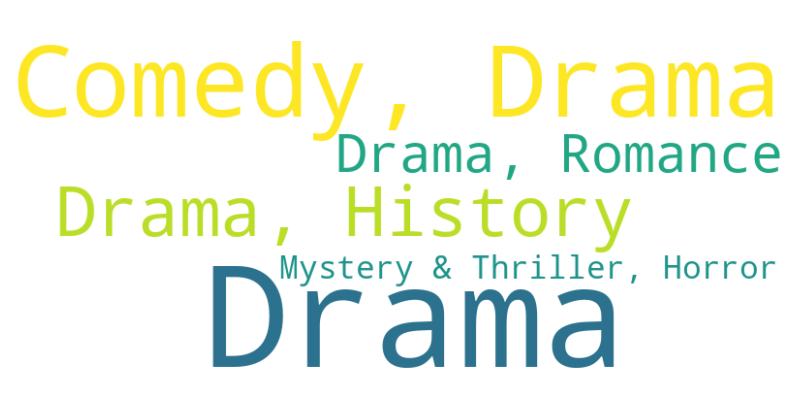

In [ ]:
#Let's Visvalize it using word cloud
movie_top_genre_dict = top_5_genre.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### For TV Shows

In [ ]:
genre_count_tv = tv_show_df['Show Genre'].value_counts()
sorted_tv_genre = genre_count_tv.sort_values(ascending=False)
top_5 = sorted_tv_genre.head()
top_5

Show Genre
Drama                               8
Crime, Drama, Mystery & Thriller    6
Drama, Crime, Mystery & Thriller    5
Reality TV                          3
Comedy, Drama, Romance              3
Name: count, dtype: int64

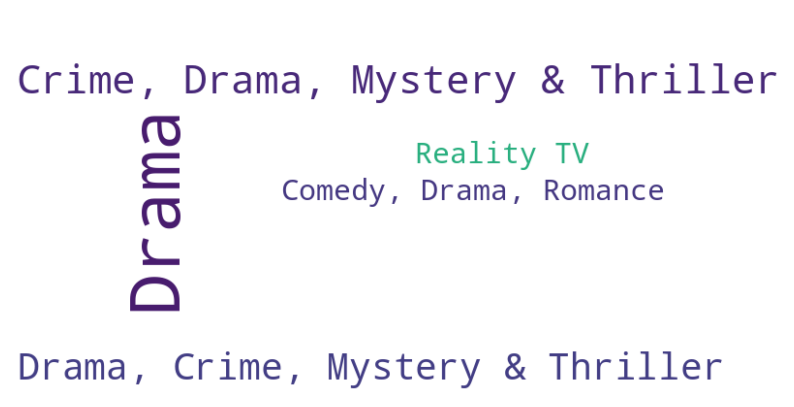

In [ ]:
#Let's Visvalize it using word cloud
tv_top_genre_dict = top_5.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

### For Movies

In [ ]:
# Write Your Code here
# Write Your Code here
movie_streaming_service_count = movies_df['Streaming Service'].value_counts()
most_common_movie_service = movie_streaming_service_count.idxmax()
most_common_movie_service

'Amazon Prime Video'

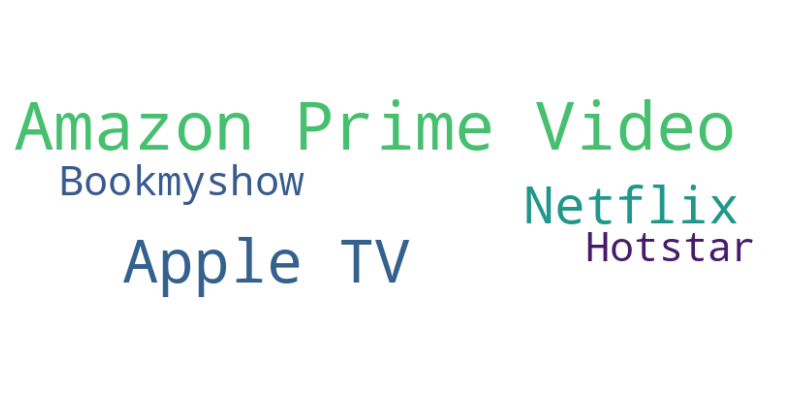

In [ ]:
#Let's Visvalize it using word cloud
top_5_movie_service_dict = movie_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_movie_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### For TV Shows

In [ ]:
# Write Your Code here
tv_streaming_service_count = tv_show_df['Streaming Service'].value_counts()
most_common_tv_service = tv_streaming_service_count.idxmax()
most_common_tv_service

'Netflix'

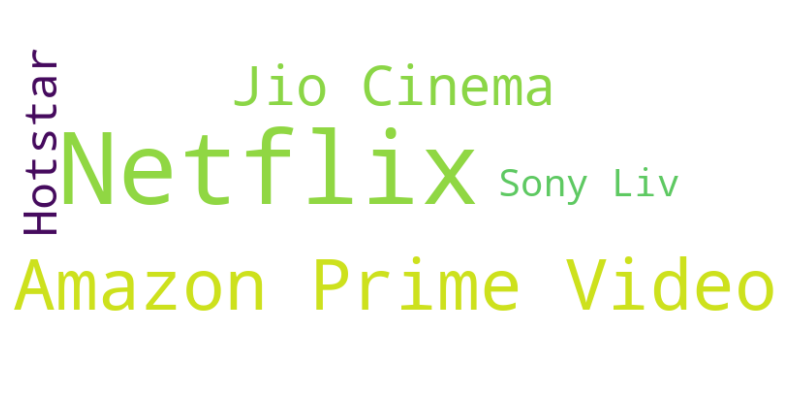

In [ ]:
top_5_tv_service_dict = tv_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_tv_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
filtered_movie_df.head()

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
0,Munjya,https://www.justwatch.com/in/movie/munjha,2024,"Comedy, Horror",7.2,2h 3min,None,None,Bookmyshow
1,Aavesham,https://www.justwatch.com/in/movie/aavesham-2024,2024,"Comedy, Action & Adventure",8.0,2h 38min,None,None,Amazon Prime Video
2,Kalki 2898 AD,https://www.justwatch.com/in/movie/project-k,2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.9,3h 1min,UA,None,Bookmyshow
6,Godzilla Minus One,https://www.justwatch.com/in/movie/godzilla-mi...,2023,"Horror, Action & Adventure, Drama, Science-Fic...",7.7,2h 5min,None,None,Netflix
7,The Fall Guy,https://www.justwatch.com/in/movie/the-fall-guy,2024,"Comedy, Drama, Romance, Action & Adventure",7.0,2h 6min,UA,None,Apple TV


In [ ]:
filtered_tv_show_df.head()

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
2,House of the Dragon,https://www.justwatch.com/in/tv-show/house-of-...,2022,"Romance, Action & Adventure, Drama, Fantasy, S...",8.4,A,None,Jio Cinema,59min
9,Shōgun,https://www.justwatch.com/in/tv-show/shogun-2024,2024,"War & Military, Drama, History",8.7,None,None,Hotstar,59min
10,Raising Voices,https://www.justwatch.com/in/tv-show/raising-v...,2024,Drama,7.2,None,None,Netflix,46min
11,The Bear,https://www.justwatch.com/in/tv-show/the-bear,2022,"Drama, Comedy",8.6,None,None,Hotstar,34min
14,Dark Matter,https://www.justwatch.com/in/tv-show/dark-matt...,2024,"Drama, Science-Fiction, Mystery & Thriller",7.8,A,None,Apple TV Plus,52min


In [ ]:
#saving final dataframe as Final Data in csv format
#saving final dataframe as Final Data in csv format
movies_df.to_csv('Just watch Movies Info.csv', index=False)
tv_show_df.to_csv('Just watch TV Show Info.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
filtered_movie_df.to_csv('Recent Good Movies Info.csv', index=False)
filtered_tv_show_df.to_csv('Recent Good TV Show Info.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**  https://drive.google.com/drive/folders/1OaNXlS6xMcjmvZ0kHTz5Esmjrhwgjmih?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***